# Pandas
Overview on all things pandas using TED talks data.

## Import Data File

In [2]:
import pandas as pd

df = pd.read_csv("data/ted.csv")
df.shape

(2550, 17)

## Get Data Types

In [13]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

## Check Empty Values

In [14]:
print(df.isna().sum())

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64


## Show Sample

In [15]:
df.event.sample(10)

992       TEDGlobal 2011
1234             TED2012
1183             TED2012
372          Taste3 2008
2147         TEDMED 2015
2115    TEDGlobal>London
1755             TED2014
352          Taste3 2008
148              TED2007
737         TEDxOilSpill
Name: event, dtype: object

## Talks Provoking Most Online Discussion

In [16]:
df["views_per_comment"] = df.views / df.comments
df.sort_values("views_per_comment").head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,735.525682


## Visualize 

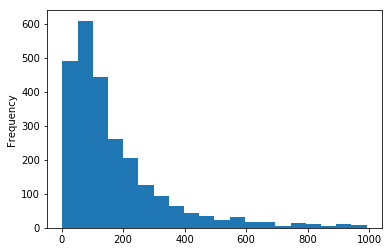

In [19]:
import matplotlib.pyplot as plt

df[df.comments < 1000].comments.plot(kind="hist", bins=20)

## Talks Per Year

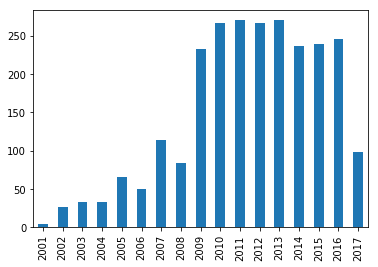

In [18]:
df["film_datetime"] = pd.to_datetime(df.film_date, unit="s")
df[["event", "film_datetime"]]
df[df.film_datetime.dt.year >= 2000].film_datetime.dt.year.value_counts().sort_index().plot(kind="bar")

## "Best" Events in TED History

In [20]:
df.groupby("event").views.agg(["count", "mean", "sum"]).sort_values("sum").tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


## Unpack Ratings Data

In [21]:
df.loc[0, "ratings"]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [22]:
type(df.ratings[0])

str

In [23]:
import ast
ast.literal_eval("[1,2,3]")

[1, 2, 3]

In [24]:
ast.literal_eval(df.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [25]:
def str_to_list(string):
    return ast.literal_eval(string)

In [26]:
df.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [27]:
df["ratings_list"] = df.ratings.apply(str_to_list)
df["ratings_list"][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

## Total Ratings For Talk

In [34]:
def get_num_ratings(ratings):
    count = 0
    for rating in ratings:
        count += rating.get("count")
    
    return count

In [42]:
df["num_ratings"] = df.ratings_list.apply(get_num_ratings)
df.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

## Occupations That Deliver Funniest TED Talks

In [46]:
def get_num_funny_ratings(ratings):
    count = 0
    for rating in ratings:
        if rating.get("name") == "Funny":
            count += rating.get("count")
    
    return count

In [66]:
df["num_funny_ratings"] = df.ratings_list.apply(get_num_funny_ratings)

In [74]:
df["funny_rate"] = df.num_funny_ratings / df.num_ratings
df.funny_rate.head(5)

0    0.209323
1    0.185286
2    0.341360
3    0.015826
4    0.054254
Name: funny_rate, dtype: float64

In [78]:
df.sort_values("funny_rate").speaker_occupation.tail()

2114            Comedian and writer
173                        Investor
747                        Comedian
1398                       Comedian
685     Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [82]:
df.groupby("speaker_occupation").funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [86]:
# occupation_counts stored as Series
occupation_counts = df.speaker_occupation.value_counts()

In [91]:
top_occupations = occupation_counts[occupation_counts >= 5].index

In [95]:
ted_top_occupations = df[df.speaker_occupation.isin(top_occupations)]
ted_top_occupations.shape

(786, 23)

In [97]:
ted_top_occupations.groupby("speaker_occupation").funny_rate.mean().sort_values().tail()

speaker_occupation
Data scientist                         0.184076
Producer                               0.202531
Singer/songwriter                      0.252205
Performance poet, multimedia artist    0.306468
Comedian                               0.512457
Name: funny_rate, dtype: float64